<a href="https://colab.research.google.com/github/likevin9911/Python-Projects/blob/main/WPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

In [6]:
import time
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

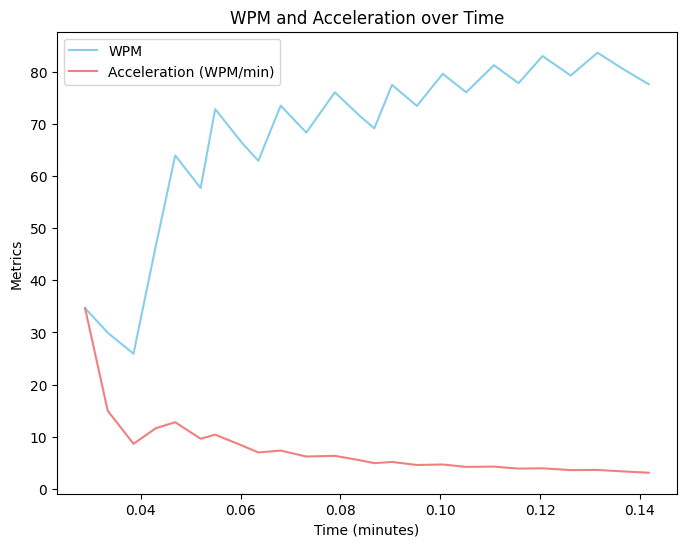

Your final WPM is: 77.58896870465378
Your final Acceleration is: 3.1035587481861513


In [7]:
full_text = [
    "Who is the best, they like ice cream and apple pie.",
    "This sentence does not contain every letter of the alphabet.",
    "Pack my box with five dozen liquor jugs.",
    "How quickly daft jumping zebras vex.",
    "Bright vixens jump; dozy fowl quack.",
    "Jived fox nymph grabs quick waltz.",
    "Glib jocks quiz nymph to vex dwarf.",
    "Sphinx of black quartz, judge my vow.",
    "Two driven jocks help fax my big quiz.",
    "Five quacking zephyrs jolt my wax bed."
]

start_time = None
typed_text = ""
key_presses = 0
wpms = []
timestamps = []
accelerations = []

def get_text(num_lines):
  return ' '.join(full_text[:num_lines])

def calculate_metrics(start_time, end_time, typed_text, key_presses):
  total_time = (end_time - start_time) / 60
  word_count = len(typed_text.split())
  wpm = (word_count / total_time) if total_time > 0 else 0
  acceleration = wpm / key_presses if key_presses > 0 else 0
  return wpm, acceleration

def start_typing_test(b):
  global start_time, timestamps, wpms, accelerations, typed_test
  key_presses = 0
  typed_test = ""
  timestamps = []
  accelerations = []
  clear_output()
  num_lines = line_slider.value
  display(widgets.Label(value="Start typing here: "))
  display(HTML(f"<div>{get_text(num_lines)}</div>"))
  display(input_box)
  input_box.disabled = False
  input_box.value = ""
  start_time = time.time()

def update_metrics(change):
  global key_presses, typed_text, timestamps, wpms, accelerations
  if input_box.value.endswith('\n'):
    input_box.disabled = True
    end_time = time.time()
    wpm, acceleration = calculate_metrics(start_time, end_time, typed_text, key_presses)
    display_result()
  else:
    end_time = time.time()
    typed_text = change['new']
    key_presses += 1
    wpm, acceleration = calculate_metrics(start_time, end_time, typed_text, key_presses)
    timestamps.append((end_time - start_time) / 60)
    wpms.append(wpm)
    accelerations.append(acceleration)

def check_typing(change):
  typed_text = change['new']
  correct_text = get_text(line_slider.value)
  colored_text = ''
  for i, char in enumerate(typed_text):
    if i < len(correct_text):
      if char == correct_text[i]:
        colored_text += f'<span style="color:green">{char}</span>'
      else:
        colored_text += f'<span style="color:red">{char}</span>'
    else:
      colored_text += f'<span style="color:red">{char}</span>'
  display(HTML(f"<div>{colored_text}</div>"))

def display_result():
  clear_output()
  plt.figure(figsize=(8, 6))
  plt.plot(timestamps, wpms, color='skyblue', label='WPM')
  plt.plot(timestamps, accelerations, color='lightcoral', label='Acceleration (WPM/min)')
  plt.xlabel('Time (minutes)')
  plt.ylabel('Metrics')
  plt.title('WPM and Acceleration over Time')
  plt.legend()
  plt.show()
  print(f"Your final WPM is: {wpms[-1]}")
  print(f"Your final Acceleration is: {accelerations[-1]}")

start_button = widgets.Button(description="Start Test")
start_button.on_click(start_typing_test)

input_box = widgets.Textarea(placehodler="Type the text here... ")
input_box.observe(update_metrics, names='value')
input_box.observe(check_typing, names='value')

line_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Lines: ')

display(widgets.Label(value="Select the number of sentences to type: "))
display(line_slider)
display(start_button)